# Stock Price Prediction

In [148]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [149]:
Stock_data=pd.read_csv('Stock price.csv')
Stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [150]:
Stock_data.shape

(1009, 7)

In [151]:
Stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [152]:
# Convert 'Date' column to datetime
Stock_data['Date'] = pd.to_datetime(Stock_data['Date'])

# Get the minimum and maximum dates
min_date = Stock_data['Date'].min()
max_date = Stock_data['Date'].max()

# Calculate the difference in days
total_days = (max_date - min_date).days

# Print the results
print(f'Dataframe contains stock prices between {min_date} and {max_date}')
print(f'Total days= {total_days} days')

Dataframe contains stock prices between 2018-02-05 00:00:00 and 2022-02-04 00:00:00
Total days= 1460 days


In [153]:
Stock_data = Stock_data.drop(['Adj Close'],axis=1)

In [154]:
Stock_data

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200


In [155]:
Stock_data.describe()

,Date,Open,High,Low,Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,5.465535e+06


<Axes: >

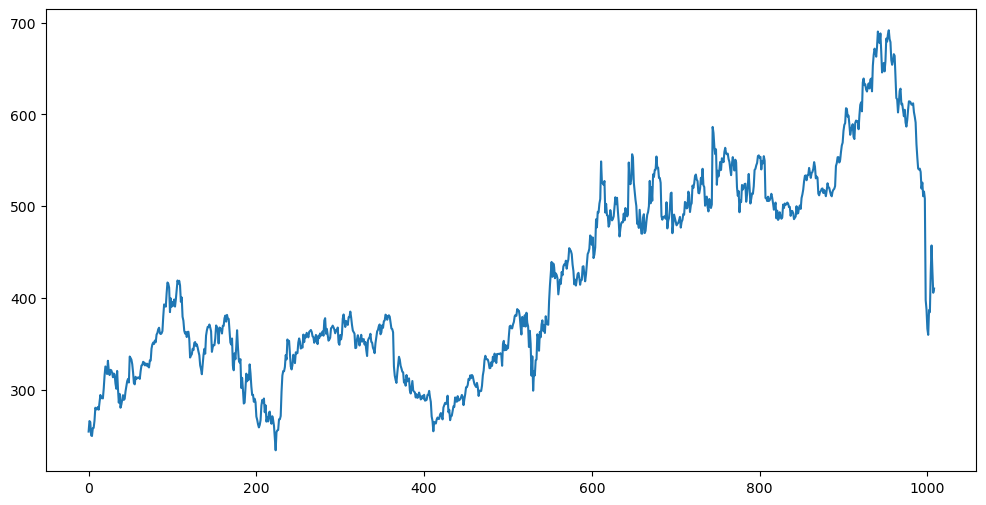

In [156]:
# Show the data visually
Stock_data['Close'].plot()

In [157]:
X=Stock_data.drop(['Close','Date'],axis=1)

In [158]:
X

,Open,High,Low,Volume
0,262.000000,267.899994,250.029999,11896100
1,247.699997,266.700012,245.000000,12595800
2,266.579987,272.450012,264.329987,8981500
3,267.079987,267.619995,250.000000,9306700
4,253.850006,255.800003,236.110001,16906900
...,...,...,...,...
1004,401.970001,427.700012,398.200012,20047500
1005,432.959991,458.480011,425.540009,22542300
1006,448.250000,451.980011,426.480011,14346000
1007,421.440002,429.260010,404.279999,9905200


In [159]:
y= Stock_data['Close']

In [160]:
y

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
# split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [163]:
len(Stock_data)

1009

In [164]:
#Use linear Regression model to predict stock price 

from sklearn.linear_model import LinearRegression

In [165]:
## cross validation
from sklearn.model_selection import cross_val_score

In [166]:
model= LinearRegression()

In [167]:
model.fit(X_train,y_train)

LinearRegression()

In [168]:
mse=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [169]:
np.mean(mse)

-15.745381184051563

In [170]:
# prediction

test_preds=model.predict(X_test)

In [171]:
dframe = pd.DataFrame(y_test, test_preds)

In [172]:
df = pd.DataFrame({'Actual Price':y_test, 'Predicted':test_preds})

In [173]:
df

,Actual Price,Predicted
628,509.640015,508.335750
631,494.730011,492.557649
741,500.859985,506.793226
514,380.070007,380.994962
365,315.100006,319.303885
...,...,...
778,504.540009,510.357926
370,335.779999,334.378994
7,266.000000,268.737090
155,350.350006,355.079881


In [174]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, r2_score

In [175]:
score=r2_score(test_preds,y_test)

In [176]:
score

0.9987539655543833

In [177]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [178]:
mse = mean_squared_error(y_test, test_preds)

In [179]:
mse

14.042264565846414

In [180]:
mae = mean_absolute_error(y_test, test_preds)

In [181]:
mae

2.740118516003842

In [182]:
rmae = np.sqrt(mean_squared_error(y_test, test_preds))

In [183]:
rmae

3.747300970811714

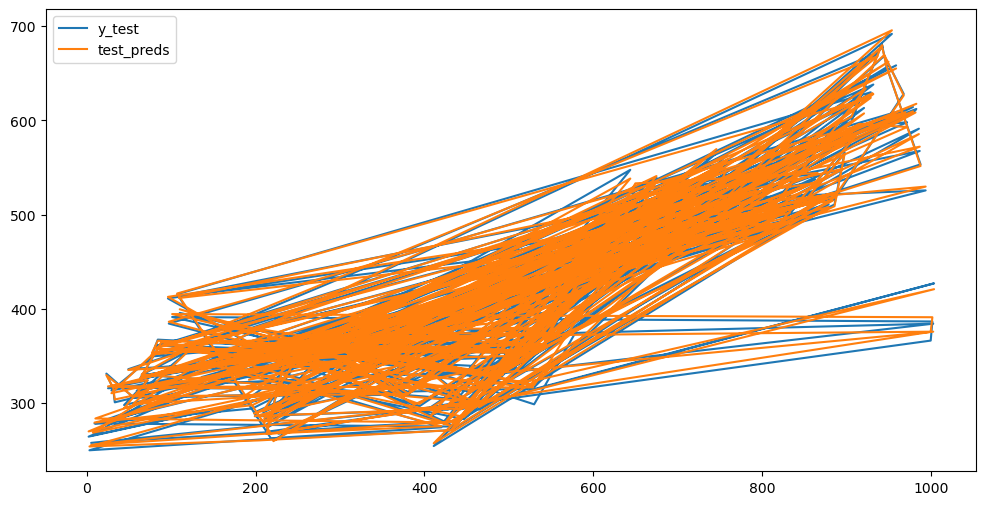

In [184]:
plt.rcParams['figure.figsize'] = (12,6)
plt.plot(df.index, y_test, label='y_test')
plt.plot(df.index, test_preds, label='test_preds')
plt.legend()
plt.show()

<Axes: >

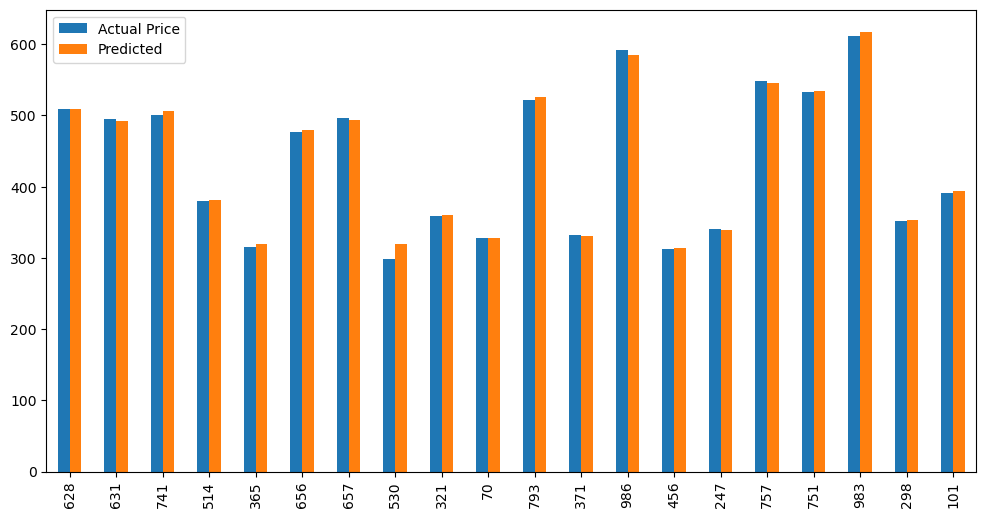

In [185]:
graph = df.head(20)

graph.plot(kind='bar')

# In future new data are arrive use this model to predict the Stock price

In [186]:
# Save the trained model
import joblib as jb

jb.dump(model, 'linear_regression_model')

['linear_regression_model']

In [187]:
# Load the trained model
model = jb.load('linear_regression_model')
